https://www.reddit.com/r/classicwow/comments/a43hch/survey_results_subreddit_update/ <br>
https://www.reddit.com/r/classicwow/comments/9yt514/world_of_warcraft_classic_census_and_demographics/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
FACTION = 'Alliance'  # Alliance, Horde or All

In [3]:
#file_path = r"D:\temp\Copy of WoW_ Classic Census Survey Raw Results.csv"
file_path = r"~/temp/Copy of WoW_ Classic Census Survey Raw Results_2.csv"
df = pd.read_csv(file_path)

In [4]:
df.describe()

,Timestamp,What region will you be playing on?,What type of sever will you be playing on?,What faction will your character belong to?,What gender will your character be?,What race will your character be?,What class will your character be?,What will the primary role of your character be?,What primary professions will you be using while leveling from 1-60?,What primary professions will you be using at level 60?,What is your age?,Do you have an active World of Warcraft subscription?,What is the earliest retail World of Warcraft expansion you played?,What is the most recent retail World of Warcraft expansion you played?,"Had you played on a Vanilla WoW private server, prior to Classic's announcement?","Will you roll the same class your previous main, or try a new one?","From the launch of Classic, how long do you anticipate it will take you, in real-world-time, to reach level 60?",What content are you most excited about?
count,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175,10175
unique,10090,4,4,2,2,8,9,3,35,35,6,2,8,8,2,3,7,163
top,11/20/2018 16:57:56,Americas,PvP,For the Alliance!,Male,Human,Warrior,DPS,"Alchemy, Herbalism","Alchemy, Herbalism",25 - 34,No,Vanilla,Battle for Azeroth,Yes,I will be rolling the same class as my previou...,1 - 2 months,"Dungeons, Raids, Community Interactions"
freq,3,5246,7219,5259,7434,2269,1816,6212,1690,2223,6261,7391,7245,5089,7274,4142,3409,614


In [5]:
df.rename(columns={'What region will you be playing on?': 'Region',
                   'What type of sever will you be playing on?': 'ServerType',
                   'What faction will your character belong to?': 'Faction',
                   'What gender will your character be?': 'Gender', 
                   'What race will your character be?': 'Race',
                   'What class will your character be?': 'Class',
                   'What will the primary role of your character be?': 'Role',
                   'What primary professions will you be using while leveling from 1-60?': 'Professions Below 60',
                   'What primary professions will you be using at level 60?': 'Professions At 60',
                   'What is your age?': 'Age',
                   'Do you have an active World of Warcraft subscription?': 'Active Subscription',
                   'What is the earliest retail World of Warcraft expansion you played?': 'Earliest Played',
                   'What is the most recent retail World of Warcraft expansion you played?': 'Recent Played',
                   'Had you played on a Vanilla WoW private server, prior to Classic\'s announcement?': 'Private Server',
                   'Will you roll the same class your previous main, or try a new one?': 'Same Main',
                   'From the launch of Classic, how long do you anticipate it will take you, in real-world-time, to reach level 60?': 'Expected Time To 60',
                   'What content are you most excited about?': 'Most Excited Content'
                  },
          inplace=True)

In [6]:
print(df['Faction'].value_counts())
df_alliance = df[df['Faction'].str.contains('Alliance')]
df_horde = df[df['Faction'].str.contains('Horde')]

For the Alliance!    5259
For the Horde!       4916
Name: Faction, dtype: int64


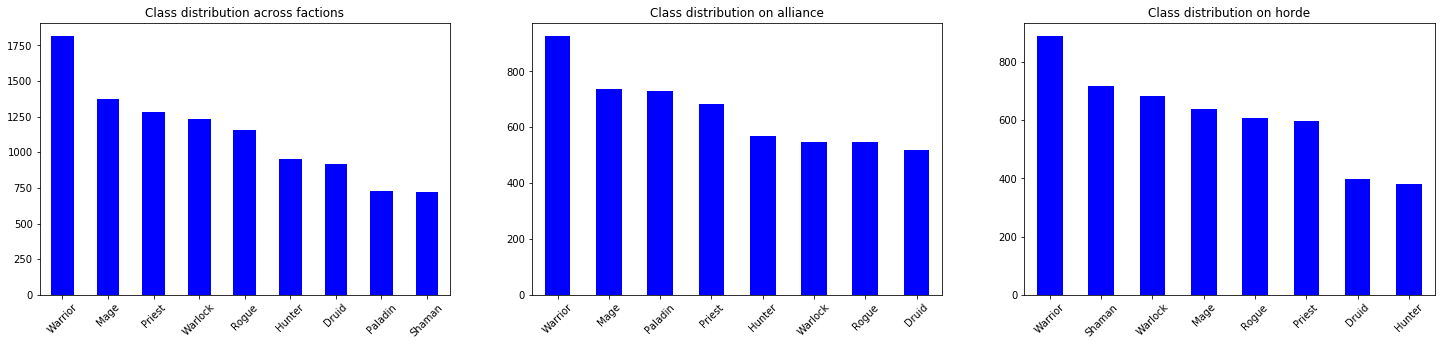

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

df['Class'].value_counts().plot(ax=axes[0],
                                kind='bar',
                                rot=45,
                                color='b',
                                title='Class distribution across factions')

df_alliance['Class'].value_counts().plot(ax=axes[1],
                                         kind='bar',
                                         rot=45,
                                         color='b',
                                         title='Class distribution on alliance')

df_horde['Class'].value_counts().plot(ax=axes[2],
                                      kind='bar',
                                      rot=45,
                                      color='b',
                                      title='Class distribution on horde')

plt.show()

Find percentage classes

In [8]:
def get_class_percent(dataframe):
    classes = dataframe['Class'].value_counts().keys().tolist()
    num_all = dataframe.shape[0]
    classes_fraction = {}
    for c in classes:
        num_class = dataframe['Class'][dataframe['Class']==c].count()
        classes_fraction[c] = num_class / num_all
    return classes_fraction
    
classes_fraction_alliance = get_class_percent(df_alliance)
classes_fraction_horde = get_class_percent(df_horde)

In [9]:
for k, v in classes_fraction_alliance.items():
    print(f"{k}: {v*100:.0f}%")
print()
for k, v in classes_fraction_horde.items():
    print(f"{k}: {v*100:.0f}%")

Warrior: 18%
Mage: 14%
Paladin: 14%
Priest: 13%
Hunter: 11%
Warlock: 10%
Rogue: 10%
Druid: 10%

Warrior: 18%
Shaman: 15%
Warlock: 14%
Mage: 13%
Rogue: 12%
Priest: 12%
Druid: 8%
Hunter: 8%


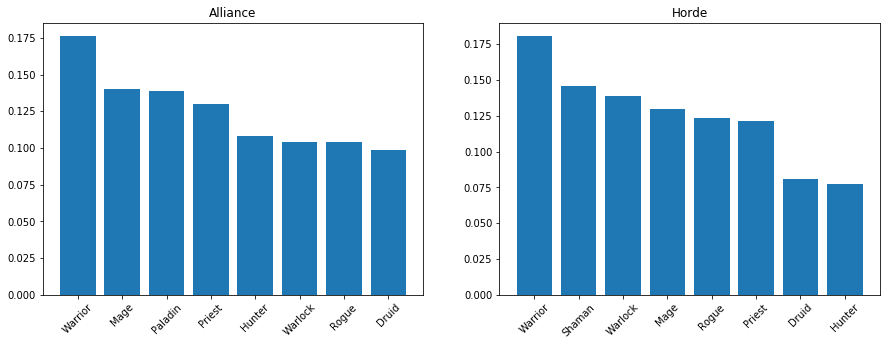

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].set_title('Alliance')
axes[0].bar(classes_fraction_alliance.keys(), classes_fraction_alliance.values())
axes[1].set_title('Horde')
axes[1].bar(classes_fraction_horde.keys(), classes_fraction_horde.values())

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

In [11]:
raid_comp_alliance = {'Warrior': 8,
                      'Rogue': 6,
                      'Mage': 7,
                      'Priest': 5,
                      'Warlock': 4,
                      'Hunter': 3,
                      'Druid': 3,
                      'Paladin': 4}

raid_comp_horde = {'Warrior': 8,
                  'Rogue': 6,
                  'Mage': 8,
                  'Priest': 5,
                  'Warlock': 4,
                  'Hunter': 2,
                  'Druid': 2,
                  'Shaman': 5}

print(f"Alliance raid size: {sum(raid_comp_alliance.values())}")
print(f"Horde raid size: {sum(raid_comp_horde.values())}")

Alliance raid size: 40
Horde raid size: 40


In [12]:
def get_raid_comp_fraction(raid_dict):
    raid_fraction = {}
    tot_sum = sum(raid_dict.values())
    for c, v in raid_dict.items():
        raid_fraction[c] = v / tot_sum
    return raid_fraction

raid_fraction_alliance = get_raid_comp_fraction(raid_comp_alliance)
raid_fraction_horde = get_raid_comp_fraction(raid_comp_horde)

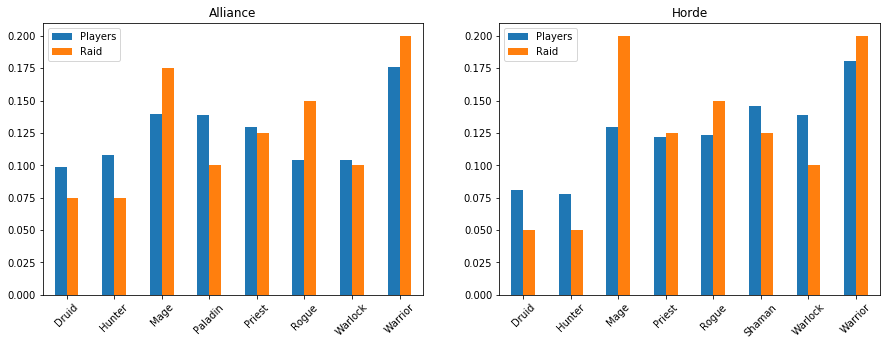

In [13]:
raid_list_alliance = []
player_list_alliance = []
classes_list_alliance = sorted(list(classes_fraction_alliance.keys()))

raid_list_horde = []
player_list_horde = []
classes_list_horde = sorted(list(classes_fraction_horde.keys()))

for c in classes_list_alliance:
    raid_list_alliance.append(raid_fraction_alliance[c])
    player_list_alliance.append(classes_fraction_alliance[c])

for c in classes_list_horde:
    raid_list_horde.append(raid_fraction_horde[c])
    player_list_horde.append(classes_fraction_horde[c])

df_a = pd.DataFrame({'Players': player_list_alliance,
                     'Raid': raid_list_alliance},
                    index=classes_list_alliance)

df_h = pd.DataFrame({'Players': player_list_horde,
                     'Raid': raid_list_horde},
                    index=classes_list_horde)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_title('Alliance')
df_a.plot.bar(ax=axes[0], rot=45)
axes[1].set_title('Horde')
df_h.plot.bar(ax=axes[1], rot=45)